In [1]:

import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('archive(2)','Covid19-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


archive(2)\Covid19-dataset\covid19-xray-cnn-100.ipynb
archive(2)\Covid19-dataset\.ipynb_checkpoints\covid19-xray-cnn-100-checkpoint.ipynb
archive(2)\Covid19-dataset\test\Covid\0100.jpeg
archive(2)\Covid19-dataset\test\Covid\0102.jpeg
archive(2)\Covid19-dataset\test\Covid\0105.png
archive(2)\Covid19-dataset\test\Covid\0106.jpeg
archive(2)\Covid19-dataset\test\Covid\0108.jpeg
archive(2)\Covid19-dataset\test\Covid\0111.jpg
archive(2)\Covid19-dataset\test\Covid\0112.jpg
archive(2)\Covid19-dataset\test\Covid\0113.jpg
archive(2)\Covid19-dataset\test\Covid\0115.jpeg
archive(2)\Covid19-dataset\test\Covid\0118.jpeg
archive(2)\Covid19-dataset\test\Covid\0119.jpeg
archive(2)\Covid19-dataset\test\Covid\0120.jpg
archive(2)\Covid19-dataset\test\Covid\094.png
archive(2)\Covid19-dataset\test\Covid\096.png
archive(2)\Covid19-dataset\test\Covid\098.jpeg
archive(2)\Covid19-dataset\test\Covid\auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg
archive(2)\Covid19-dataset\test\Covid\auntmin

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D 
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import os
import shutil
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt
import time
import copy
from random import shuffle

import tqdm.notebook as tqdm

import sklearn
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.metrics import classification_report
from PIL import Image
import cv2

import os
import shutil

In [3]:
COVID_PATH = 'C:\\Users\\Menna Fawzy\\Documents\\Computer Vision AAST\\computer vision\\archive(2)\\Covid19-dataset\\train\\Covid'
NORMAL_PATH = 'C:\\Users\\Menna Fawzy\\Documents\\Computer Vision AAST\\computer vision\\archive(2)\\Covid19-dataset\\train\\Normal'
ViralPneumonia_PATH = 'C:\\Users\\Menna Fawzy\\Documents\\Computer Vision AAST\\computer vision\\archive(2)\\Covid19-dataset\\train\\Viral Pneumonia'


In [4]:
DATA_PATH = 'C:\\Users\\Menna Fawzy\\Documents\\Computer Vision AAST\\computer vision\\archive(2)\\Covid19-dataset\\train'

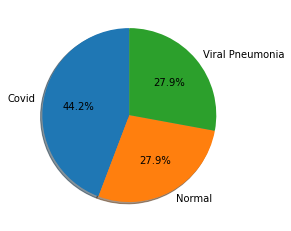

In [5]:
class_names = os.listdir(DATA_PATH)
image_count = {}
for i in class_names:
    image_count[i] = len(os.listdir(os.path.join(DATA_PATH,i)))

#Plotting Distribution of Each Classes
fig1, ax1 = plt.subplots()
ax1.pie(image_count.values(),
        labels = image_count.keys(),
        shadow=True,
        autopct = '%1.1f%%',
        startangle=90)
plt.show()

C:\Users\Menna Fawzy\AppData\Local\Temp\ipykernel_27428\1001813832.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


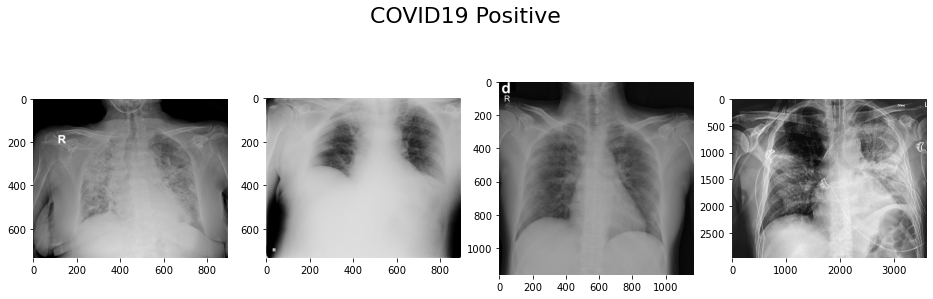

In [6]:
fig = plt.figure(figsize=(16,5))
fig.suptitle("COVID19 Positive", size=22)
img_paths = os.listdir(COVID_PATH)
shuffle(img_paths)

for i,image in enumerate(img_paths[:4]):
    img = cv2.imread(os.path.join(COVID_PATH, image))
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img)
fig.show()

C:\Users\Menna Fawzy\AppData\Local\Temp\ipykernel_27428\2599686391.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


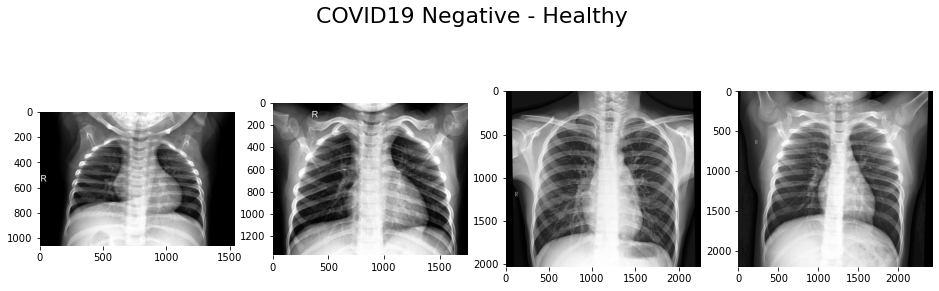

In [7]:
fig = plt.figure(figsize=(16,5))
fig.suptitle("COVID19 Negative - Healthy", size=22)
img_paths = os.listdir(NORMAL_PATH)
shuffle(img_paths)

for i,image in enumerate(img_paths[:4]):
    img = cv2.imread(os.path.join(NORMAL_PATH, image))
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img)
fig.show()

C:\Users\Menna Fawzy\AppData\Local\Temp\ipykernel_27428\4132356269.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


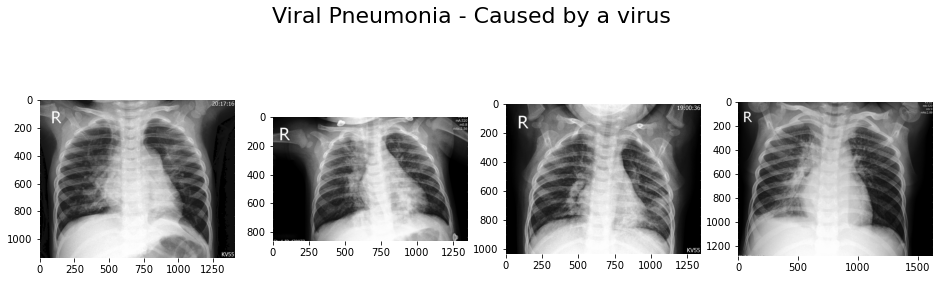

In [8]:
fig = plt.figure(figsize=(16,5))
fig.suptitle("Viral Pneumonia - Caused by a virus", size=22)
img_paths = os.listdir(ViralPneumonia_PATH)
shuffle(img_paths)

for i,image in enumerate(img_paths[:4]):
    img = cv2.imread(os.path.join(ViralPneumonia_PATH, image))
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img)
fig.show()

# Data Transforms or Augmentation

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [10]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [11]:

training_set = train_datagen.flow_from_directory(
    'C:\\Users\\Menna Fawzy\Documents\\Computer Vision AAST\\computer vision\\archive(2)\\Covid19-dataset\\train',
    target_size=(650, 650),
    batch_size=32,
    class_mode='categorical')

Found 251 images belonging to 3 classes.


In [12]:

test_set = test_datagen.flow_from_directory(
    'C:\\Users\\Menna Fawzy\\Documents\\\Computer Vision AAST\\computer vision\\archive(2)\\Covid19-dataset\\test',
    target_size=(650, 650),
    batch_size=32,
    class_mode='categorical')


Found 66 images belonging to 3 classes.


# CNN-Model

In [31]:

CNN = Sequential()

CNN.add(Convolution2D(32,(3,3),activation="relu",input_shape=(650,650,3)))

CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Convolution2D(32,(3,3),activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Convolution2D(32,(3,3),activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Flatten())

CNN.add(Dense(units=128,activation ="relu"))

CNN.add(Dense(units=3,activation="softmax"))

CNN.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


CNN.fit(
    training_set,
    epochs=98,
    validation_data=test_set
)


Epoch 1/98
8/8 [==============================] - 61s 7s/step - loss: 4.6485 - accuracy: 0.3944 - val_loss: 0.8781 - val_accuracy: 0.5606
Epoch 2/98
8/8 [==============================] - 58s 7s/step - loss: 0.9111 - accuracy: 0.6454 - val_loss: 0.6077 - val_accuracy: 0.7727
Epoch 3/98
8/8 [==============================] - 61s 8s/step - loss: 0.6909 - accuracy: 0.6932 - val_loss: 0.5738 - val_accuracy: 0.7576
Epoch 4/98
8/8 [==============================] - 63s 8s/step - loss: 0.4584 - accuracy: 0.8207 - val_loss: 0.5561 - val_accuracy: 0.8030
Epoch 5/98
8/8 [==============================] - 65s 8s/step - loss: 0.3401 - accuracy: 0.8486 - val_loss: 0.3480 - val_accuracy: 0.8030
Epoch 6/98
8/8 [==============================] - 66s 8s/step - loss: 0.2540 - accuracy: 0.9044 - val_loss: 0.5255 - val_accuracy: 0.8182
Epoch 7/98
8/8 [==============================] - 65s 8s/step - loss: 0.3511 - accuracy: 0.8606 - val_loss: 0.6833 - val_accuracy: 0.6667
Epoch 8/98
8/8 [==================

In [13]:

from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint

# Define the checkpoint filepath
checkpoint_filepath = 'best_7thproject.h5'

# Create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

# Define the CNN model
CNN = Sequential()
CNN.add(Convolution2D(32, (3, 3), activation="relu", input_shape=(650, 650, 3)))
CNN.add(MaxPooling2D(pool_size=(2, 2)))
CNN.add(Convolution2D(32, (3, 3), activation="relu"))
CNN.add(MaxPooling2D(pool_size=(2, 2)))
CNN.add(Convolution2D(32, (3, 3), activation="relu"))
CNN.add(MaxPooling2D(pool_size=(2, 2)))
CNN.add(Flatten())
CNN.add(Dense(units=128, activation="relu"))
CNN.add(Dense(units=3, activation="softmax"))

# Compile the CNN model
CNN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the CNN model with the checkpoint callback
history = CNN.fit(
    training_set,
    epochs=100,
    validation_data=test_set,
    callbacks=[checkpoint]
)


#Note that you need to import the `Sequential`, `Convolution2D`, `MaxPooling2D`, `Flatten`, and `Dense` classes from Keras 
#to define the CNN model, and the `ModelCheckpoint` class from Keras callbacks to create the checkpoint callback. Also, you can modify the `filepath` parameter to save the model with a different name or path.

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 3.2651 - accuracy: 0.3785 
Epoch 1: val_accuracy improved from -inf to 0.39394, saving model to best_7thproject.h5
8/8 [==============================] - 135s 16s/step - loss: 3.2651 - accuracy: 0.3785 - val_loss: 0.9609 - val_accuracy: 0.3939
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.6932 
Epoch 2: val_accuracy improved from 0.39394 to 0.62121, saving model to best_7thproject.h5
8/8 [==============================] - 125s 15s/step - loss: 0.6948 - accuracy: 0.6932 - val_loss: 0.7221 - val_accuracy: 0.6212
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.5784 - accuracy: 0.7530 
Epoch 3: val_accuracy improved from 0.62121 to 0.69697, saving model to best_7thproject.h5
8/8 [==============================] - 124s 15s/step - loss: 0.5784 - accuracy: 0.7530 - val_loss: 0.5769 - val_accuracy: 0.6970
Epoch 4/100
8/8 [==============================] - ETA: 0s - 

In [14]:
# Save entire model
CNN.save("7thbestacc.h5")


1/1 [==============================] - 0s 112ms/step


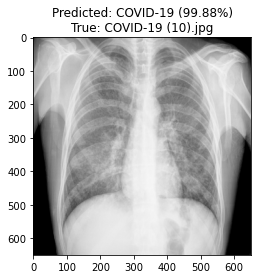

1/1 [==============================] - 0s 92ms/step


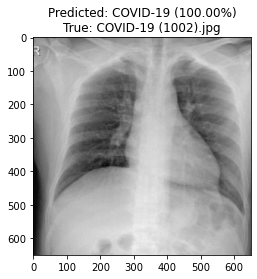

1/1 [==============================] - 0s 88ms/step


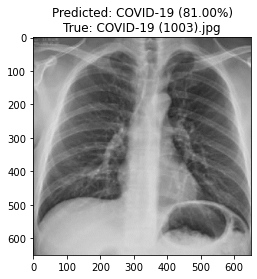

1/1 [==============================] - 0s 96ms/step


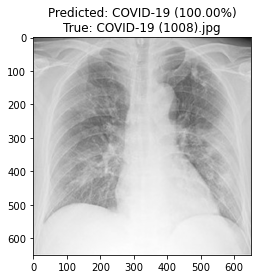

1/1 [==============================] - 0s 87ms/step


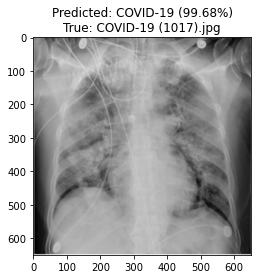

1/1 [==============================] - 0s 84ms/step


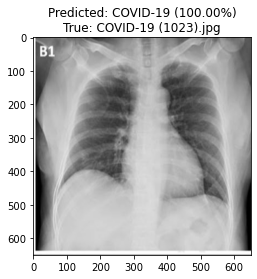

1/1 [==============================] - 0s 80ms/step


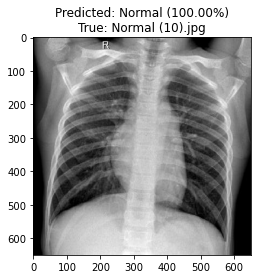

1/1 [==============================] - 0s 80ms/step


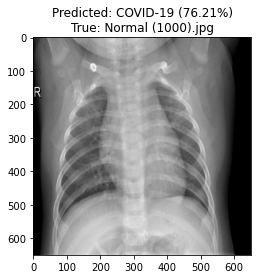

1/1 [==============================] - 0s 74ms/step


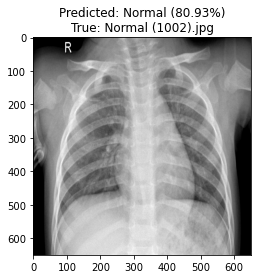

1/1 [==============================] - 0s 72ms/step


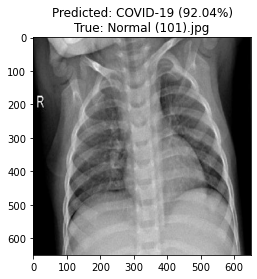

1/1 [==============================] - 0s 73ms/step


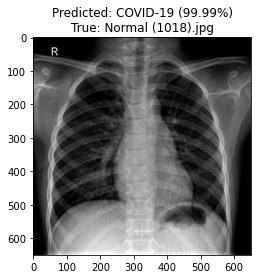

1/1 [==============================] - 0s 72ms/step


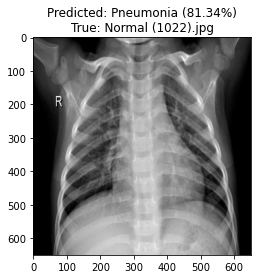

1/1 [==============================] - 0s 72ms/step


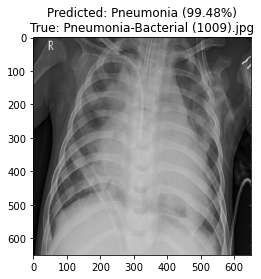

1/1 [==============================] - 0s 72ms/step


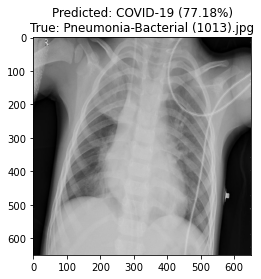

1/1 [==============================] - 0s 73ms/step


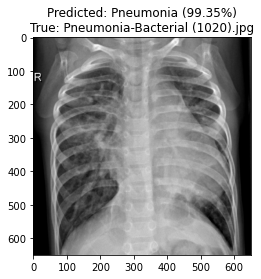

1/1 [==============================] - 0s 169ms/step


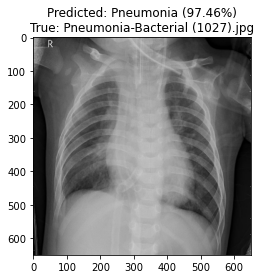

1/1 [==============================] - 0s 166ms/step


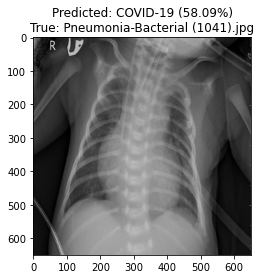

1/1 [==============================] - 0s 172ms/step


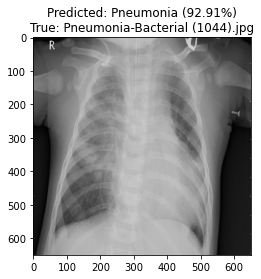

In [30]:
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('best_7thproject.h5')

# Define a dictionary to map the class indices to their respective labels
class_labels = {
    0: 'COVID-19',
    1: 'Normal',
    2: 'Pneumonia'
}

# Define the path to the folder containing the images to test
test_dir = 'C:\\Users\\Menna Fawzy\\Documents\\Computer Vision AAST\\computer vision\\archive(2)\\Covid19-dataset\\Test final'

# Loop through each image in the folder and make predictions
for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)
    img = image.load_img(img_path, target_size=(650, 650))
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr /= 255.0
    
    prediction = model.predict(img_arr)[0]
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]
    confidence = prediction[predicted_class] * 100
    
    true_label = img_file.split('_')[0] # Assumes the true label is the first part of the filename before the underscore
    
    # Plot the image and show the predicted and true labels
    fig, ax = plt.subplots()
    ax.imshow(img_arr[0])
    ax.set_title(f'Predicted: {predicted_label} ({confidence:.2f}%)\nTrue: {true_label}')
    plt.show()


1/1 [==============================] - 0s 127ms/step


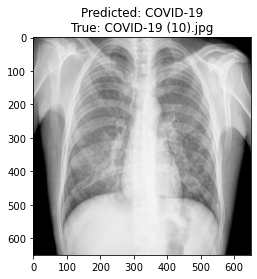

1/1 [==============================] - 0s 71ms/step


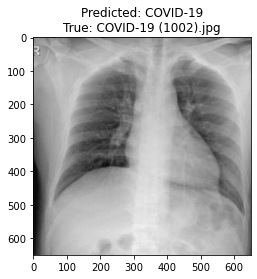

1/1 [==============================] - 0s 80ms/step


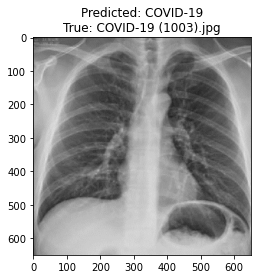

1/1 [==============================] - 0s 65ms/step


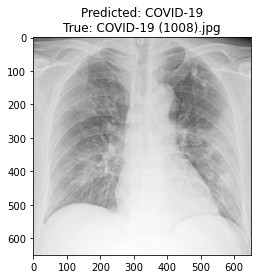

1/1 [==============================] - 0s 64ms/step


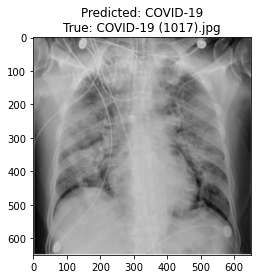

1/1 [==============================] - 0s 90ms/step


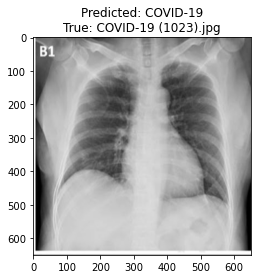

1/1 [==============================] - 0s 72ms/step


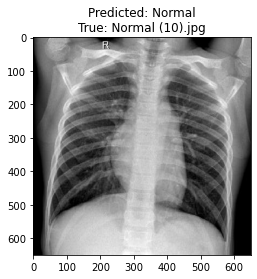

1/1 [==============================] - 0s 104ms/step


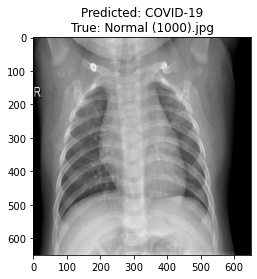

1/1 [==============================] - 0s 72ms/step


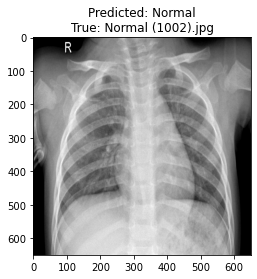

1/1 [==============================] - 0s 105ms/step


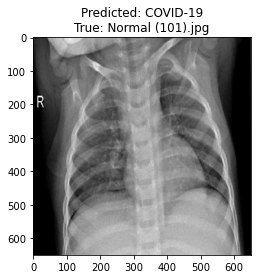

1/1 [==============================] - 0s 79ms/step


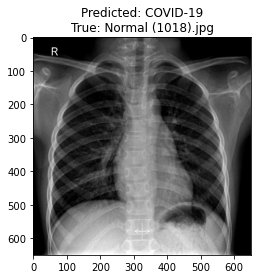

1/1 [==============================] - 0s 93ms/step


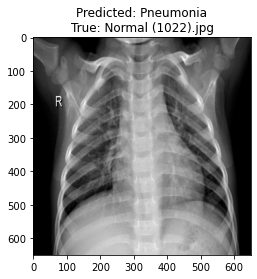

1/1 [==============================] - 0s 82ms/step


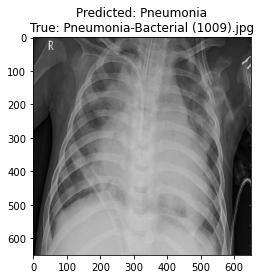

1/1 [==============================] - 0s 98ms/step


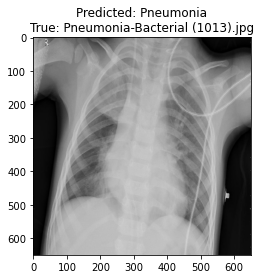

1/1 [==============================] - 0s 88ms/step


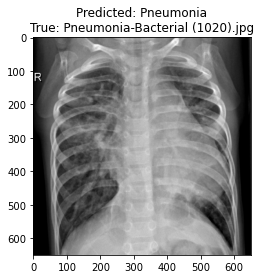

1/1 [==============================] - 0s 72ms/step


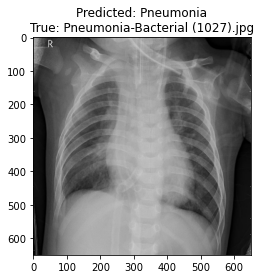

1/1 [==============================] - 0s 80ms/step


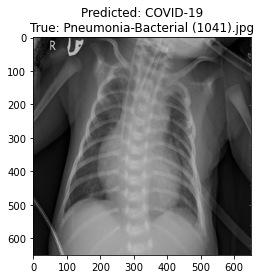

1/1 [==============================] - 0s 72ms/step


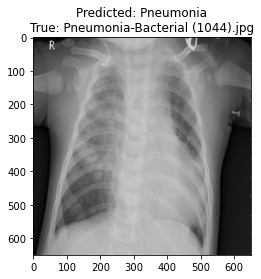

In [29]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('7thbestacc.h5')

# Define a dictionary to map the class indices to their respective labels
class_labels = {
    0: 'COVID-19',
    1: 'Normal',
    2: 'Pneumonia'
}

# Define the path to the folder containing the images to test
test_dir = 'C:\\Users\\Menna Fawzy\\Documents\\Computer Vision AAST\\computer vision\\archive(2)\\Covid19-dataset\\Test final'

# Loop through each image in the folder and make predictions
for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)
    img = load_img(img_path, target_size=(650, 650))
    img_arr = img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr /= 255.0
    
    prediction = model.predict(img_arr)[0]
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]
    
    true_label = img_file.split('_')[0] # Assumes the true label is the first part of the filename before the underscore
    
    # Plot the image and show the predicted and true labels
    fig, ax = plt.subplots()
    ax.imshow(img_arr[0])
    ax.set_title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.show()


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight

# Define the checkpoint filepath
checkpoint_filepath = 'best7thproject.h5'

# Create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

# Define the class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    np.unique(training_set.classes),
    training_set.classes
)

# Define the CNN model
cnn = Sequential()
cnn.add(Convolution2D(32, (3, 3), activation="relu", input_shape=(250, 250, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Convolution2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Convolution2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation="relu"))
cnn.add(Dense(units=3, activation="softmax"))

# Compile the CNN model
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the CNN model with the checkpoint callback and class weights
history = cnn.fit(
    training_set,
    epochs=100,
    validation_data=test_set,
    class_weight=class_weights,
    callbacks=[checkpoint]
)
